In [3]:
# keras 环境
from GEmbedding.ge import *
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import numpy as np
import sklearn.metrics as mt
import datetime
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
print(datetime.date.today().strftime("%Y%m%d")[2:])

230407


---

In [5]:
# 原始邻接矩阵
md = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/mirna_drug_1043_2166.txt",sep = ',', header = 0, index_col = 0)
(r,c) = md.shape
print(r,c)

drug_node = md.columns.to_list()        # drug节点列表
rna_node = md.index.to_list()           # rna节点列表
# print(drug_node[:10],'\n',rna_node[:10],sep='')

print(len(drug_node),":",drug_node)
print(len(rna_node),":",rna_node)
print(md.shape)
rr = int(r / 10)    # 行10等分
cc = int(c / 10)    # 列10等分

1043 2166
2166 : ['15', '119', '137', '176', '187', '190', '241', '243', '244', '247', '280', '281', '305', '311', '338', '444', '460', '544', '564', '586', '598', '612', '679', '681', '702', '712', '727', '750', '753', '757', '774', '784', '785', '807', '896', '936', '938', '946', '947', '948', '977', '978', '985', '988', '996', '999', '1004', '1023', '1030', '1031', '1032', '1046', '1051', '1054', '1060', '1089', '1091', '1110', '1123', '1130', '1175', '1176', '1207', '1674', '1676', '1727', '1775', '1832', '1923', '1935', '1978', '1981', '1983', '1986', '1989', '1990', '1993', '2082', '2083', '2088', '2092', '2099', '2118', '2123', '2130', '2131', '2132', '2140', '2141', '2145', '2148', '2153', '2157', '2159', '2160', '2161', '2162', '2164', '2165', '2170', '2179', '2187', '2194', '2197', '2200', '2202', '2206', '2216', '2236', '2244', '2247', '2249', '2265', '2266', '2267', '2284', '2315', '2327', '2335', '2336', '2337', '2343', '2345', '2350', '2351', '2353', '2365', '2366', '2368

In [6]:
# 标签信息
ground_truth = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None)
ground_truth = ground_truth.values
y_true = ground_truth.reshape(-1)
print(ground_truth.shape)

(1043, 2166)


In [7]:
# 加载所有的边信息
all_edge = []
with open("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/mirna_drug_entry_1043_2166.txt", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        all_edge.append(row)

print(all_edge)

[['hsa-let-7a', '21633059'], ['hsa-let-7a', '46843772'], ['hsa-let-7a', '444732'], ['hsa-let-7a', '5757'], ['hsa-let-7a', '36462'], ['hsa-let-7a', '162282'], ['hsa-let-7a', '712'], ['hsa-let-7a', '3229'], ['hsa-let-7a', '4091'], ['hsa-let-7a', '3385'], ['hsa-let-7a', '969516'], ['hsa-let-7a', '5280795'], ['hsa-let-7a', '3652'], ['hsa-let-7a', '5865'], ['hsa-let-7a-1', '60750'], ['hsa-let-7a-3', '444795'], ['hsa-let-7b', '60750'], ['hsa-let-7b', '3229'], ['hsa-let-7b', '5757'], ['hsa-let-7b', '36462'], ['hsa-let-7b', '229455'], ['hsa-let-7b', '5310940'], ['hsa-let-7b', '712'], ['hsa-let-7b', '4091'], ['hsa-let-7b', '3385'], ['hsa-let-7c', '60750'], ['hsa-let-7c', '444795'], ['hsa-let-7c', '444732'], ['hsa-let-7c', '5757'], ['hsa-let-7c', '229455'], ['hsa-let-7c', '712'], ['hsa-let-7c', '119307'], ['hsa-let-7c', '4091'], ['hsa-let-7c', '6623'], ['hsa-let-7d', '241'], ['hsa-let-7d', '60750'], ['hsa-let-7d', '444795'], ['hsa-let-7d', '5757'], ['hsa-let-7d', '446220'], ['hsa-let-7d', '712']

---

---

### 单个图表示学习方法的交叉验证 数据集按行row切分

In [ ]:
K = 10              # K-fold交叉验证

Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)

In [ ]:
# 创建空数组 -- 预测数组
prediction = np.empty([0,c])
print(prediction.shape)

In [ ]:
# 从行角度做交叉验证 即抽样rna 不抽样drug
for i in range(0,K):
    print("*"*15+"第{}次交叉验证".format(i+1)+"*"*15)

    Gr.remove_edges_from(list(Gr.edges))
    Gd.remove_edges_from(list(Gd.edges))
    
    print("Gr节点数:", Gr.number_of_nodes(), " Gd节点数:", Gd.number_of_nodes())
    if Gr.number_of_edges() == 0 and Gd.number_of_edges() == 0:
        print("Gr Gd 边信息清零成功!")
    else:
        print("Gr Gd 边信息清零错误!")
        break

    cv_rna_node = rna_node[0:i*rr] + rna_node[(i+1)*rr:]
    # cv_drug_node = drug_node[0:i*rr] + drug_node[(i+1)*rr:]
    # print("rna总结点数:{}, 抽样节点数:{}\ndrug总结点数:{}, 抽样节点数:{}".format(
    #     len(rna_node), len(cv_rna_node), len(drug_node), len(cv_drug_node)))
    print("rna总结点数:{}, 抽样节点数:{}, 隐藏节点数:{}".format(len(rna_node), len(cv_rna_node), len(rna_node)-len(cv_rna_node)))

    # Gr Gd 边信息一致 仅节点不一样
    print("Gr Gd子图边信息构造")
    for (na, nb) in all_edge:
        if na in cv_rna_node:   # rna节点在采样节点中
            Gr.add_edge(na, nb)
            Gd.add_edge(na, nb)
    
    print("Gr 节点数:{} 边数:{}".format(Gr.number_of_nodes(), Gr.number_of_edges()))

    # 使用Deepwalk 获取整张子图嵌入
    model = DeepWalk(Gr, walk_length=10, num_walks=80, workers=1)
    model.train(window_size=5, iter=3)
    gr_embeddings = model.get_embeddings()  

    model = DeepWalk(Gd, walk_length=10, num_walks=80, workers=1)
    model.train(window_size=5, iter=3)
    gd_embeddings = model.get_embeddings()
    
    # 分别提取所有rna节点和drug节点的嵌入
    rna_embeddings = []
    for rna in rna_node:
        rna_embeddings.append(gr_embeddings[rna])
    rna_embeddings = np.array(rna_embeddings)

    drug_embeddings = []
    for drug in drug_node:
        drug_embeddings.append(gd_embeddings[drug])
    drug_embeddings = np.array(drug_embeddings)
    print("rna_embedding:",rna_embeddings.shape," drug_embedding:",drug_embeddings.shape)

    t_prediction =  rna_embeddings @ drug_embeddings.T
    print("生成预测矩阵:{}".format(t_prediction.shape))

    if i+1 == K:
        prediction = np.concatenate((prediction, t_prediction[i*rr:]), axis = 0)
    else:
        prediction = np.concatenate((prediction, t_prediction[i*rr:(i+1)*rr]), axis = 0)

    print("目前预测矩阵:{}".format(prediction.shape))

    

### 当个图表示学习方法的交叉验证 数据集按列切分

In [21]:
K = 10              # K-fold交叉验证

Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)

# 创建空数组 -- 预测数组
prediction = np.empty([r,0])
print(prediction.shape)

(1043, 0)


In [ ]:
# 从行角度做交叉验证 即抽样rna 不抽样drug
for i in range(0,K):
    print("*"*15+"第{}次交叉验证".format(i+1)+"*"*15)

    Gr.remove_edges_from(list(Gr.edges))
    Gd.remove_edges_from(list(Gd.edges))
    
    print("Gr节点数:", Gr.number_of_nodes(), " Gd节点数:", Gd.number_of_nodes())
    if Gr.number_of_edges() == 0 and Gd.number_of_edges() == 0:
        print("Gr Gd 边信息清零成功!")
    else:
        print("Gr Gd 边信息清零错误!")
        break

    cv_drug_node = drug_node[0:i*cc] + drug_node[(i+1)*cc:]
    # cv_drug_node = drug_node[0:i*rr] + drug_node[(i+1)*rr:]
    # print("rna总结点数:{}, 抽样节点数:{}\ndrug总结点数:{}, 抽样节点数:{}".format(
    #     len(rna_node), len(cv_rna_node), len(drug_node), len(cv_drug_node)))
    # print("rna总结点数:{}, 抽样节点数:{}, 隐藏节点数:{}".format(len(rna_node), len(cv_rna_node), len(rna_node)-len(cv_rna_node)))

    # Gr Gd 边信息一致 仅节点不一样
    print("Gr Gd子图边信息构造")
    for (na, nb) in all_edge:
        if na in cv_drug_node:   # rna节点在采样节点中
            Gr.add_edge(na, nb)
            Gd.add_edge(na, nb)
    
    print("Gr 节点数:{} 边数:{}".format(Gr.number_of_nodes(), Gr.number_of_edges()))

    # 使用Deepwalk 获取整张子图嵌入
    model = DeepWalk(Gr, walk_length=10, num_walks=80, workers=1)
    model.train(window_size=5, iter=3)
    gr_embeddings = model.get_embeddings()  

    model = DeepWalk(Gd, walk_length=10, num_walks=80, workers=1)
    model.train(window_size=5, iter=3)
    gd_embeddings = model.get_embeddings()
    
    # 分别提取所有rna节点和drug节点的嵌入
    rna_embeddings = []
    for rna in rna_node:
        rna_embeddings.append(gr_embeddings[rna])
    rna_embeddings = np.array(rna_embeddings)

    drug_embeddings = []
    for drug in drug_node:
        drug_embeddings.append(gd_embeddings[drug])
    drug_embeddings = np.array(drug_embeddings)
    print("rna_embedding:",rna_embeddings.shape," drug_embedding:",drug_embeddings.shape)

    t_prediction =  rna_embeddings @ drug_embeddings.T
    print("生成预测矩阵:{}".format(t_prediction.shape))

    if i+1 == K:
        prediction = np.concatenate((prediction, t_prediction[:,i*cc:]), axis = 1)
    else:
        prediction = np.concatenate((prediction, t_prediction[:,i*cc:(i+1)*cc]), axis = 1)

    print("目前预测矩阵:{}".format(prediction.shape))

#### 分析指标计算

In [24]:
# y_true = ground_truth.reshape(-1)
y_pred = prediction.reshape(-1)
print(y_true.shape, y_pred.shape)
print('AUC:',mt.roc_auc_score(y_true, y_pred, average='macro'))
print('AUC:',mt.roc_auc_score(y_true, y_pred, average='micro'))
print('AUC:',mt.roc_auc_score(y_true, y_pred, average='weighted'))

(2259138,) (2259138,)
AUC: 0.5074144203563288
AUC: 0.5074144203563288
AUC: 0.5074144203563288


In [ ]:
# np.save("/mnt/yzy/NIMCGCN/Prediction/DeepWalk_10fold_cv_230306.npy",prediction)

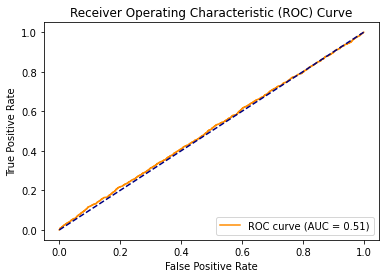

In [25]:
# 计算 ROC 曲线的数据点
fpr, tpr, _ = roc_curve(y_true, y_pred)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

---

---

### 对比多种图表示学习方法提取图结构特征 从行row角度切分数据集

In [23]:
K = 10              # K-fold交叉验证
# methodList = [DeepWalk, LINE, Node2Vec, SDNE, Struc2Vec]    # 待筛选方法
# methodList = [DeepWalk, LINE, Node2Vec, Struc2Vec ]
methodList = [DeepWalk, LINE, Node2Vec ]


Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)

In [24]:
file = open("log.txt",'w+')

for method in methodList:

    print("-"*20+str(method)+"-"*20)
    prediction = np.empty([0,c])
    
    for i in range(0,K):
        print("*"*15+"第{}次交叉验证".format(i+1)+"*"*15)

        Gr.remove_edges_from(list(Gr.edges))
        Gd.remove_edges_from(list(Gd.edges))
        
        # print("Gr节点数:", Gr.number_of_nodes(), " Gd节点数:", Gd.number_of_nodes())
        if Gr.number_of_edges() == 0 and Gd.number_of_edges() == 0:
            # print("Gr Gd 边信息清零成功!")
            pass
        else:
            # print("Gr Gd 边信息清零错误!")
            break

        cv_rna_node = rna_node[0:i*rr] + rna_node[(i+1)*rr:]
        # cv_drug_node = drug_node[0:i*rr] + drug_node[(i+1)*rr:]
        # print("rna总结点数:{}, 抽样节点数:{}\ndrug总结点数:{}, 抽样节点数:{}".format(
        #     len(rna_node), len(cv_rna_node), len(drug_node), len(cv_drug_node)))
        # print("rna总结点数:{}, 抽样节点数:{}, 隐藏节点数:{}".format(len(rna_node), len(cv_rna_node), len(rna_node)-len(cv_rna_node)))

        # Gr Gd 边信息一致 仅节点不一样
        # print("Gr Gd子图边信息构造")
        for (na, nb) in all_edge:
            if na in cv_rna_node:   # rna节点在采样节点中
                Gr.add_edge(na, nb)
                Gd.add_edge(na, nb)
        
        # print("Gr 节点数:{} 边数:{}".format(Gr.number_of_nodes(), Gr.number_of_edges()))

        # 获取整张子图嵌入

        if method in [DeepWalk, Node2Vec, Struc2Vec]:
            if method == DeepWalk:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1)
            elif method == Node2Vec:
                modelR = method(Gr, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
                modelD = method(Gd, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
            elif method == Struc2Vec:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1, verbose=0)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1, verbose=0)
            
            modelR.train(window_size=5, iter=3)
            modelD.train(window_size=5, iter=3)
        
        elif method == LINE:
            modelR = LINE(Gr,embedding_size=128, order='second')
            modelD = LINE(Gd,embedding_size=128, order='second')

            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        elif method == SDNE:
            modelR = SDNE(Gr, hidden_size=[256,128])
            modelD = SDNE(Gd, hidden_size=[256,128])
            
            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        gr_embeddings = modelR.get_embeddings()  
        gd_embeddings = modelD.get_embeddings()

        # 分别提取所有rna节点和drug节点的嵌入
        rna_embeddings = []
        for rna in rna_node:
            rna_embeddings.append(gr_embeddings[rna])
        rna_embeddings = np.array(rna_embeddings)

        drug_embeddings = []
        for drug in drug_node:
            drug_embeddings.append(gd_embeddings[drug])
        drug_embeddings = np.array(drug_embeddings)
        # print("rna_embedding:",rna_embeddings.shape," drug_embedding:",drug_embeddings.shape)

        t_prediction =  rna_embeddings @ drug_embeddings.T
        # print("生成预测矩阵:{}".format(t_prediction.shape))

        if i+1 == K:
            prediction = np.concatenate((prediction, t_prediction[i*rr:]), axis = 0)
        else:
            prediction = np.concatenate((prediction, t_prediction[i*rr:(i+1)*rr]), axis = 0)

        # print("目前预测矩阵:{}".format(prediction.shape))

    if method == SDNE:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_row".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), tf.Session().run(prediction) )
    else:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_row".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), prediction)
    y_pred = prediction.reshape(-1)
    # print(y_true.shape, y_pred.shape)
    print('AUC:',mt.roc_auc_score(y_true, y_pred))
    file.write("{} 10fold CV AUC: {}\n".format(str(method).split(".")[-1][:-2], mt.roc_auc_score(y_true, y_pred)))

file.close()

--------------------<class 'GEmbedding.ge.models.deepwalk.DeepWalk'>--------------------
***************第1次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第2次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第3次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第4次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第5次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第6次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第7次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第8次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第9次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第10次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
AUC: 0.48330298813100414
--------------------<class 'GEmbedding.ge.models.line.LINE'>--------------------
***************第1次交叉验证***************


2023-04-07 22:14:23.067234: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-04-07 22:14:23.157501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-04-07 22:14:23.158176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:d8:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-04-07 22:14:23.188945: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-04-07 22:14:23.700873: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
8/8 - 0s - loss: 0.6929
Epoch 2/80
8/8 - 0s - loss: 0.6922
Epoch 3/80
8/8 - 0s - loss: 0.6925
Epoch 4/80
8/8 - 0s - loss: 0.6913
Epoch 5/80
8/8 - 0s - loss: 0.6899
Epoch 6/80
8/8 - 0s - loss: 0.6905
Epoch 7/80
8/8 - 0s - loss: 0.6876
Epoch 8/80
8/8 - 0s - loss: 0.6844
Epoch 9/80
8/8 - 0s - loss: 0.6841
Epoch 10/80
8/8 - 0s - loss: 0.6777
Epoch 11/80
8/8 - 0s - loss: 0.6688
Epoch 12/80
8/8 - 0s - loss: 0.6651
Epoch 13/80
8/8 - 0s - loss: 0.6508
Epoch 14/80
8/8 - 0s - loss: 0.6317
Epoch 15/80
8/8 - 0s - loss: 0.6201
Epoch 16/80
8/8 - 0s - loss: 0.5941
Epoch 17/80
8/8 - 0s - loss: 0.5584
Epoch 18/80
8/8 - 0s - loss: 0.5394
Epoch 19/80
8/8 - 0s - loss: 0.5023
Epoch 20/80
8/8 - 0s - loss: 0.4540
Epoch 21/80
8/8 - 0s - loss: 0.4265
Epoch 22/80
8/8 - 0s - loss: 0.3902
Epoch 23/80
8/8 - 0s - loss: 0.3392
Epoch 24/80
8/8 - 0s - loss: 0.3113
Epoch 25/80
8/8 - 0s - loss: 0.2817
Epoch 26/80
8/8 - 0s - loss: 0.24

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第2次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第3次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第4次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第5次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第6次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Preprocess transition probs...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第7次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第8次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第9次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第10次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
AUC: 0.479847496893966


---

---

### 对比多种图表示学习方法提取图结构特征 从列col角度切分数据集

In [10]:
K = 10              # K-fold交叉验证
# methodList = [DeepWalk, LINE, Node2Vec, SDNE, Struc2Vec]    # 待筛选方法
# methodList = [DeepWalk, LINE, Node2Vec, Struc2Vec ]
methodList = [Struc2Vec ]

Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)

file = open("log.txt",'w+')


#########################################################################################################################

for method in methodList:

    print("-"*20+str(method)+"-"*20)
    prediction = np.empty([r,0])
    
    for i in range(0,K):
        print("*"*15+"第{}次交叉验证".format(i+1)+"*"*15)

        Gr.remove_edges_from(list(Gr.edges))
        Gd.remove_edges_from(list(Gd.edges))
        
        # print("Gr节点数:", Gr.number_of_nodes(), " Gd节点数:", Gd.number_of_nodes())
        if Gr.number_of_edges() == 0 and Gd.number_of_edges() == 0:
            # print("Gr Gd 边信息清零成功!")
            pass
        else:
            # print("Gr Gd 边信息清零错误!")
            break

        # cv_rna_node = rna_node[0:i*rr] + rna_node[(i+1)*rr:]
        cv_drug_node = drug_node[0:i*cc] + drug_node[(i+1)*cc:]
        # cv_drug_node = drug_node[0:i*rr] + drug_node[(i+1)*rr:]
        # print("rna总结点数:{}, 抽样节点数:{}\ndrug总结点数:{}, 抽样节点数:{}".format(
        #     len(rna_node), len(cv_rna_node), len(drug_node), len(cv_drug_node)))
        # print("rna总结点数:{}, 抽样节点数:{}, 隐藏节点数:{}".format(len(rna_node), len(cv_rna_node), len(rna_node)-len(cv_rna_node)))

        # Gr Gd 边信息一致 仅节点不一样
        # print("Gr Gd子图边信息构造")
        for (na, nb) in all_edge:
            if na in cv_drug_node:   # rna节点在采样节点中
                Gr.add_edge(na, nb)
                Gd.add_edge(na, nb)
        
        # print("Gr 节点数:{} 边数:{}".format(Gr.number_of_nodes(), Gr.number_of_edges()))

        # 获取整张子图嵌入

        if method in [DeepWalk, Node2Vec, Struc2Vec]:
            if method == DeepWalk:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1)
            elif method == Node2Vec:
                modelR = method(Gr, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
                modelD = method(Gd, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
            elif method == Struc2Vec:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1, verbose=0)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1, verbose=0)
            
            modelR.train(window_size=5, iter=3)
            modelD.train(window_size=5, iter=3)
        
        elif method == LINE:
            modelR = LINE(Gr,embedding_size=128, order='second')
            modelD = LINE(Gd,embedding_size=128, order='second')

            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        elif method == SDNE:
            modelR = SDNE(Gr, hidden_size=[256,128])
            modelD = SDNE(Gd, hidden_size=[256,128])
            
            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        gr_embeddings = modelR.get_embeddings()  
        gd_embeddings = modelD.get_embeddings()

        # 分别提取所有rna节点和drug节点的嵌入
        rna_embeddings = []
        for rna in rna_node:
            rna_embeddings.append(gr_embeddings[rna])
        rna_embeddings = np.array(rna_embeddings)

        drug_embeddings = []
        for drug in drug_node:
            drug_embeddings.append(gd_embeddings[drug])
        drug_embeddings = np.array(drug_embeddings)
        # print("rna_embedding:",rna_embeddings.shape," drug_embedding:",drug_embeddings.shape)

        t_prediction =  rna_embeddings @ drug_embeddings.T
        # print("生成预测矩阵:{}".format(t_prediction.shape))

        if i+1 == K:
            prediction = np.concatenate((prediction, t_prediction[:,i*cc:]), axis = 1)
        else:
            prediction = np.concatenate((prediction, t_prediction[:,i*cc:(i+1)*cc]), axis = 1)

        # print("目前预测矩阵:{}".format(prediction.shape))

    if method == SDNE:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_col".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), tf.Session().run(prediction) )
    else:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_col".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), prediction)
    y_pred = prediction.reshape(-1)
    # print(y_true.shape, y_pred.shape)
    print('AUC:',mt.roc_auc_score(y_true, y_pred))
    file.write("{} 10fold CV AUC: {}\n".format(str(method).split(".")[-1][:-2], mt.roc_auc_score(y_true, y_pred)))

file.close()

--------------------<class 'GEmbedding.ge.models.struc2vec.Struc2Vec'>--------------------
***************第1次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第2次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第3次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第4次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第5次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第6次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation don

### 结果分析(SDNE运行报错)

In [27]:
import os

In [40]:
# y_dw_pred = np.load("/mnt/yzy/NIMCGCN/Prediction/DeepWalk_10foldCV_230306.npy").reshape(-1)
# y_ln_pred = np.load("/mnt/yzy/NIMCGCN/Prediction/LINE_10foldCV_230306.npy").reshape(-1)
# y_nv_pred = np.load("/mnt/yzy/NIMCGCN/Prediction/Node2Vec_10foldCV_230306.npy").reshape(-1)
# y_sv_pred = np.load("/mnt/yzy/NIMCGCN/Prediction/Struc2Vec_10foldCV_230306.npy").reshape(-1)

# y_preds = [
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/DeepWalk_10foldCV_230407_row.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/LINE_10foldCV_230407_row.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Node2Vec_10foldCV_230407_row.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Struc2Vec_10foldCV_230407_row.npy").reshape(-1)
# ]

# y_preds = [
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Struc2Vec_10foldCV_230407_row.npy").reshape(-1)
# ]

y_preds = []
files = os.listdir(r"/mnt/yzy/NIMCGCN/Prediction/embedding/")
print(len(files))

for file in files:
    y_preds.append(np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/"+file))

print(len(y_preds))

10
10


:  (1043, 2166, 10)


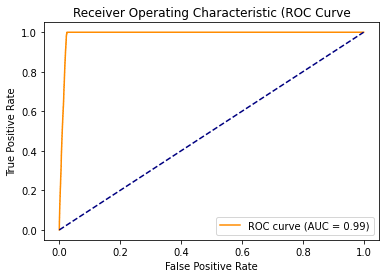

:  (1043, 2166)


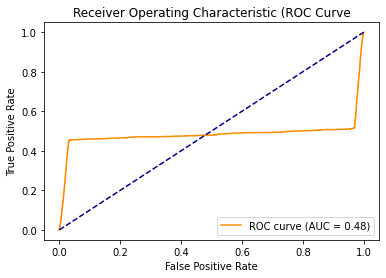

:  (1043, 2166)


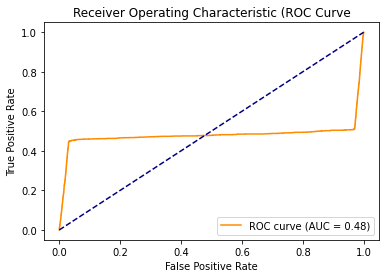

:  (1043, 2166, 10)


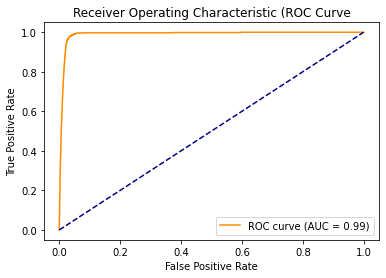

:  (1043, 2166, 10)


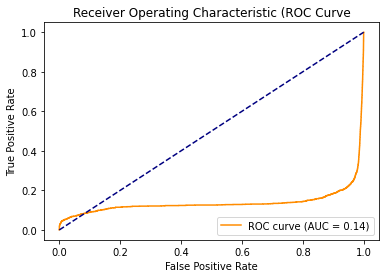

:  (1043, 2166)


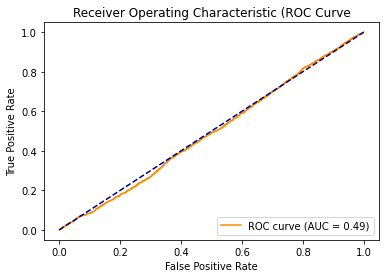

:  (1043, 2166, 10)


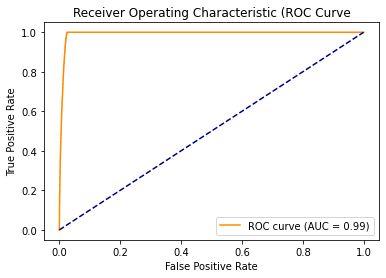

:  (1043, 2166)


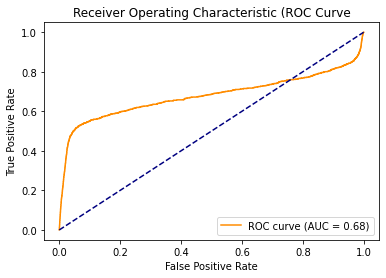

:  (1043, 2166)


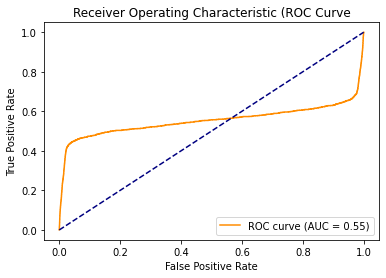

:  (1043, 2166)


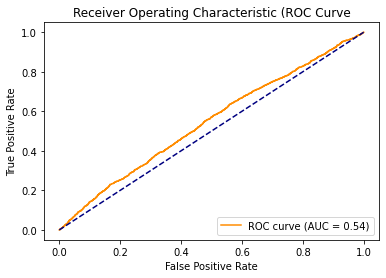

In [42]:
for y_pred in y_preds:
    print(": ",y_pred.shape)
    if len(y_pred.shape) == 2:
        y_pred = y_pred.reshape(-1)
    elif len(y_pred.shape) == 3:
        y_pred = y_pred.mean(axis=2).reshape(-1)

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    # 计算 AUC
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC Curve')
    plt.legend(loc='lower right')
    plt.show()